# Distribution for active authors

In [11]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit # The module that contains the curve_fit routine

import warnings
warnings.filterwarnings("ignore")

# Import own libraries 
import os, sys
script_path = os.path.realpath(os.path.dirname("10_on_trajectories"))
os.chdir(script_path)
sys.path.append("..")

from myLibraries.queries import * 
from myLibraries.rawData_queries import *
from myLibraries.events import *
from myLibraries.theoretical_functions import *
from myLibraries.utils import *

In [12]:
HOLE_SIZE = 7
ACTIVITY = 5
MIN_PUBS = 3

In [13]:
df = get_all_collabs()

df = df[df["2018"] != 0]
df = df[df["max_hole_size"] <= HOLE_SIZE]
df = df[df["activity"] >= ACTIVITY]
df = df[df["tot_pubs"] >= MIN_PUBS]

colls = df["2018"].values

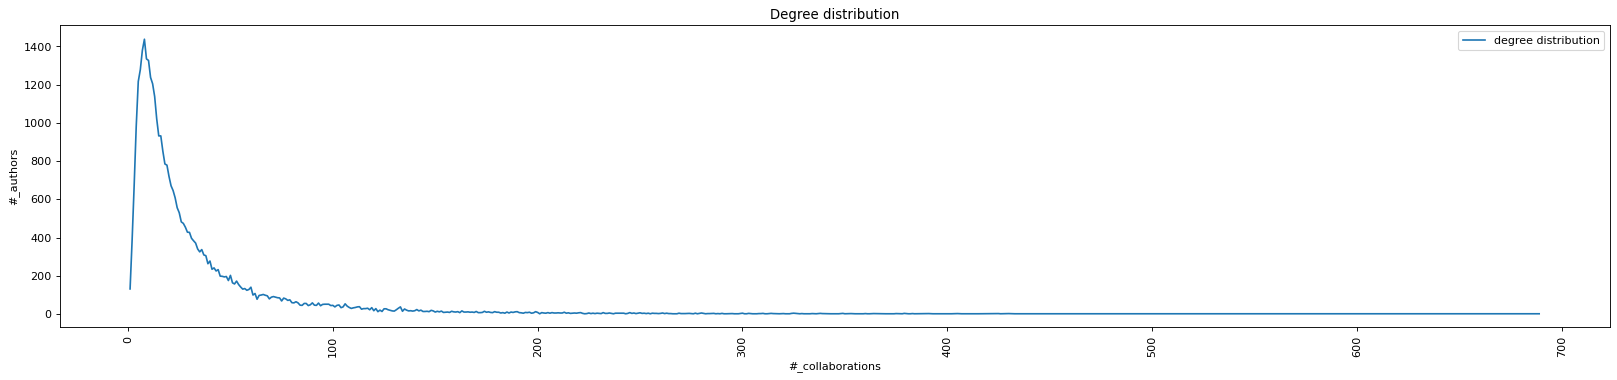

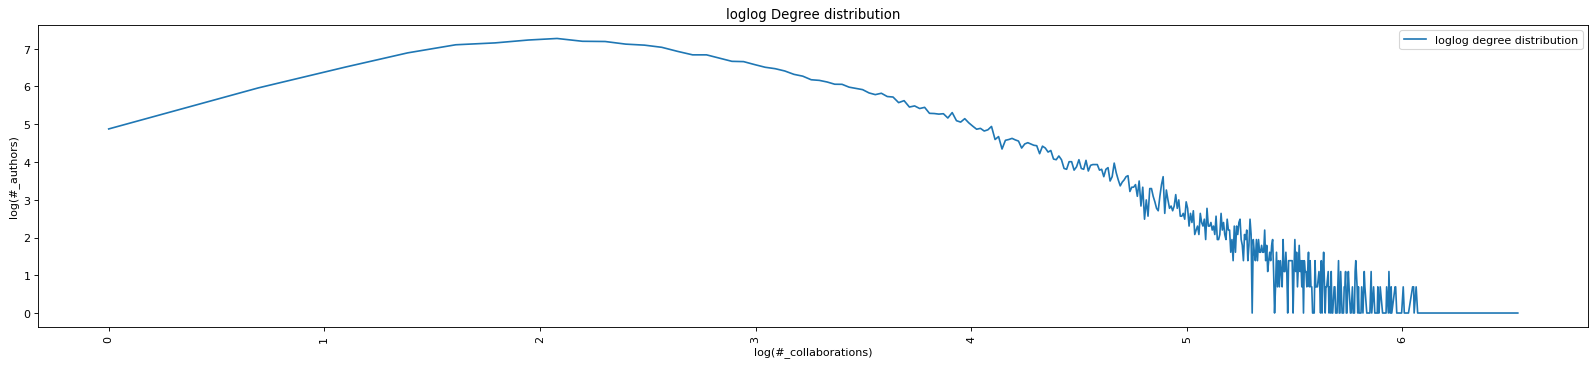

In [14]:
# DD

unique, counts = np.unique(colls, return_counts=True)
x, y = unique, counts  

draw("Degree distribution", "#_collaborations", "#_authors", x, [y], ["degree distribution"], 25, 5)
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", np.log(x), [np.log(y)], ["loglog degree distribution"], 25, 5)

# computing M_k with k>=18 to avoid the starting pike 

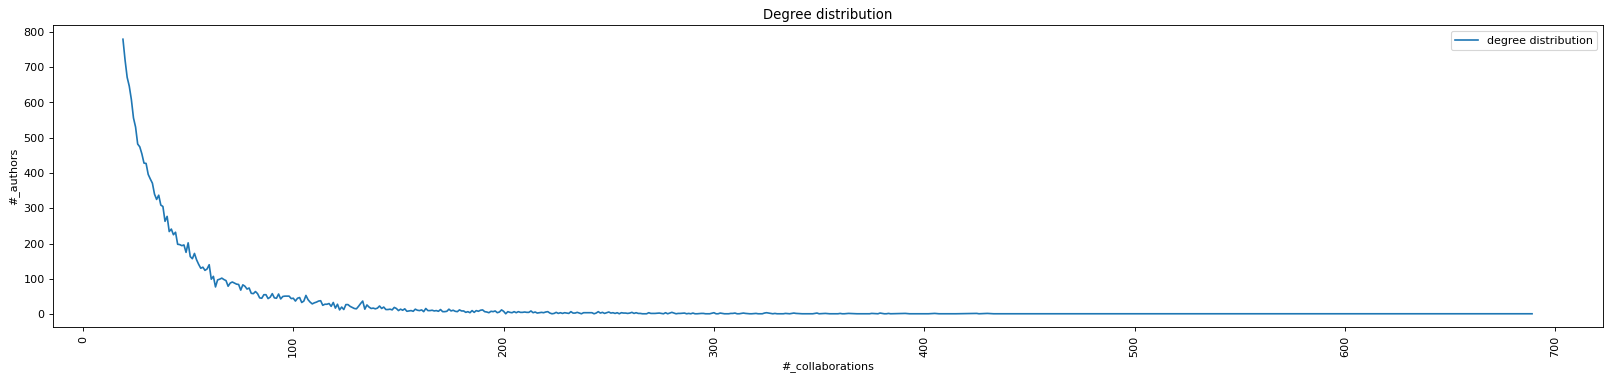

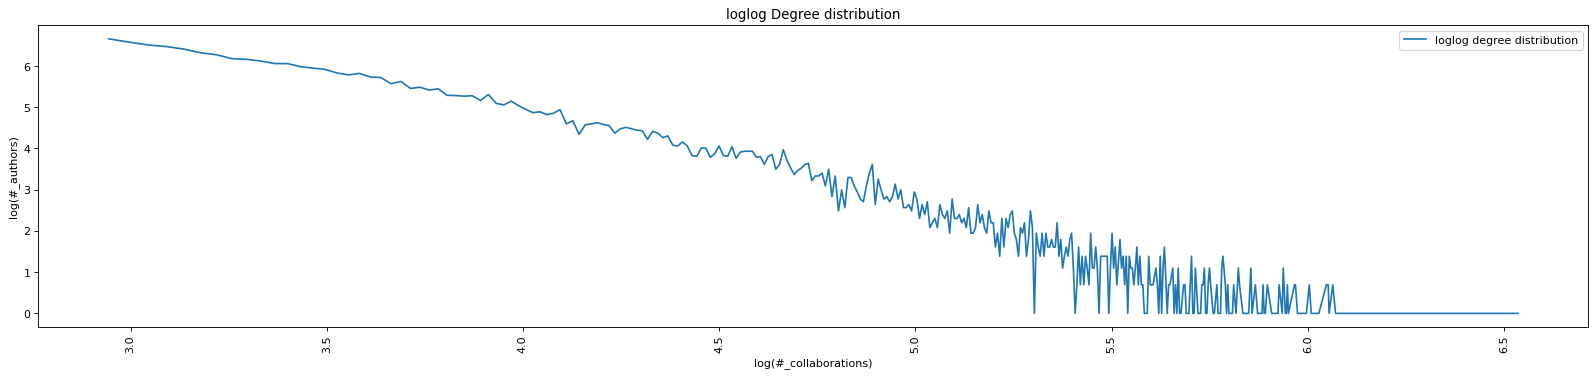

In [15]:
# DD
unique, counts = np.unique(colls, return_counts=True)
x, y = unique[18:], counts[18:]  


draw("Degree distribution", "#_collaborations", "#_authors", x, [y], ["degree distribution"], 25, 5)
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", np.log(x), [np.log(y)], ["loglog degree distribution"], 25, 5)

# Powerlaw fitting

In [16]:
# powerlaw 
def powerlaw(x,c, gamma):
    y = []
    for i in range(len(x)):
        y.append(c*pow(x[i], - gamma))
   
    return y

def fit_powerlaw(xdata, ydata):
    popt, pcov = curve_fit(powerlaw, xdata, ydata, bounds=([0,1], [np.inf, np.inf]))
    c = popt[0]
    gamma = popt[1]

    print('Power law fit with parameters -> c:', c, ', gamma:', gamma)
    
    return powerlaw(xdata, c, gamma), c, gamma

# powerlaw_exp_cutoff 
def powerlaw_exp_cutoff(x,c, gamma, sigma):
    y = []
    for i in range(len(x)):
        y.append(c*pow(x[i], - gamma) * pow(sigma, x[i]))
    return y

def fit_powerlaw_exp_cutoff(xdata, ydata):
    popt, pcov = curve_fit(powerlaw_exp_cutoff, xdata, ydata, bounds=([0, 1, 0], [np.inf, np.inf, 2]))
    c = popt[0]
    gamma = popt[1]
    sigma = popt[2]

    print('Power law with exponential cutoff fit with parameters -> c:', c, ', gamma:', gamma, ', sigma:', sigma)
    
    return powerlaw_exp_cutoff(xdata, c, gamma, sigma), c, gamma, sigma

# exponential 
def exponential(x, c, exp):
    y = []
    for i in range(len(x)):
        y.append(c*pow(exp, x[i]))
    return y

def fit_exponential(xdata, ydata):
    popt, pcov = curve_fit(exponential, xdata, ydata)
    c = popt[0]
    exp = popt[1]

    print('exponential fit with parameters -> a:', exp, 'c:', c)
    
    return exponential(xdata, c, exp), c, exp



Power law fit with parameters -> c: 124532.68388476782 , gamma: 1.698199884572186
Power law with exponential cutoff fit with parameters -> c: 22286.519130699402 , gamma: 1.0404865877865368 , sigma: 0.9848141397108233
exponential fit with parameters -> a: 0.9575312091282183 c: 1602.1105973364415


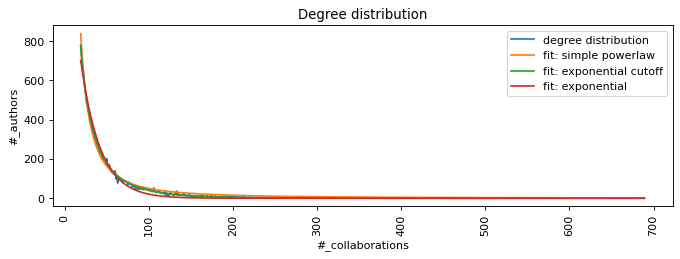

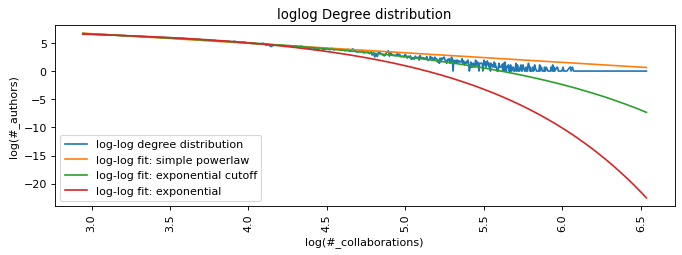

In [17]:
# fitting with power law and power law with exponential cutoff 
my_powerlaw_Fit = fit_powerlaw(x, y)[0]
my_powerlaw_cutoff_Fit = fit_powerlaw_exp_cutoff(x, y)[0]
exp_fit = fit_exponential(x, y)[0]

draw("Degree distribution",  "#_collaborations", "#_authors", x, [y, my_powerlaw_Fit, my_powerlaw_cutoff_Fit, exp_fit], ["degree distribution", "fit: simple powerlaw", "fit: exponential cutoff", "fit: exponential"], 10, 3)
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", np.log(x), [np.log(y), np.log(my_powerlaw_Fit), np.log(my_powerlaw_cutoff_Fit), np.log(exp_fit) ], ["log-log degree distribution", "log-log fit: simple powerlaw", "log-log fit: exponential cutoff", "log-log fit: exponential"], 10, 3)

# Errors

In [18]:
def err(y1,y2):
    err = 0
    for i in range(len(y1)):
        err += pow(abs(y1[i] - y2[i]), 2)
    return err

print("power law err:", err(my_powerlaw_Fit, y))
print("power law cutoff err:", err(my_powerlaw_cutoff_Fit, y))
print("exp err:", err(exp_fit, y))


power law err: 54264.953148401815
power law cutoff err: 12841.764152200942
exp err: 55820.70003931789


# Sliding starting k


starting x = 20 

Power law fit with parameters -> c: 149172.4002664033 , gamma: 1.7453434480393621
Power law with exponential cutoff fit with parameters -> c: 23234.867764291357 , gamma: 1.0550181945088446 , sigma: 0.9850842590331977
exponential fit with parameters -> a: 0.9593924298065654 c: 1479.209790513814

power law err: 44678.00398834885
exp err: 44120.602312139265
power law cutoff err: 12778.73907635611


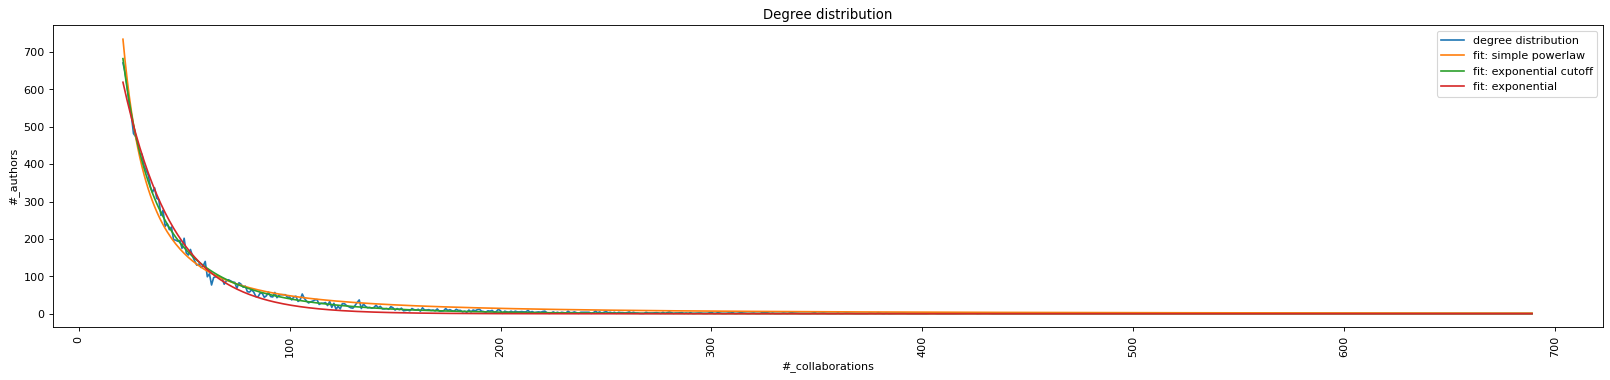

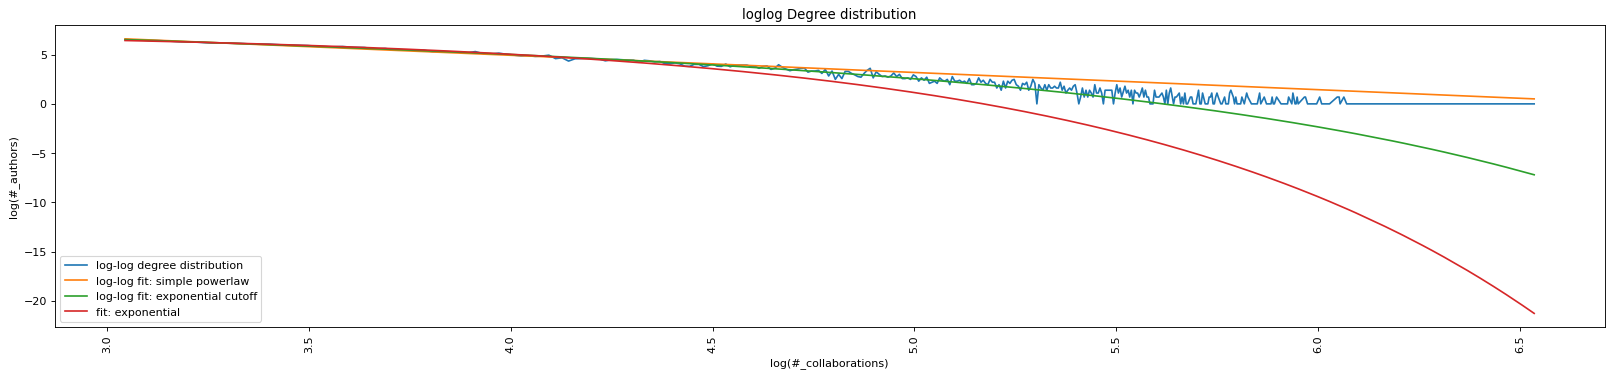




starting x = 30 

Power law fit with parameters -> c: 405429.99899549223 , gamma: 1.9955125992970204
Power law with exponential cutoff fit with parameters -> c: 76319.36822294458 , gamma: 1.4399950731202469 , sigma: 0.9909091262037493
exponential fit with parameters -> a: 0.9648394214307031 c: 1122.971345712195

power law err: 14974.78871421736
exp err: 25542.63519850648
power law cutoff err: 9547.311372302784


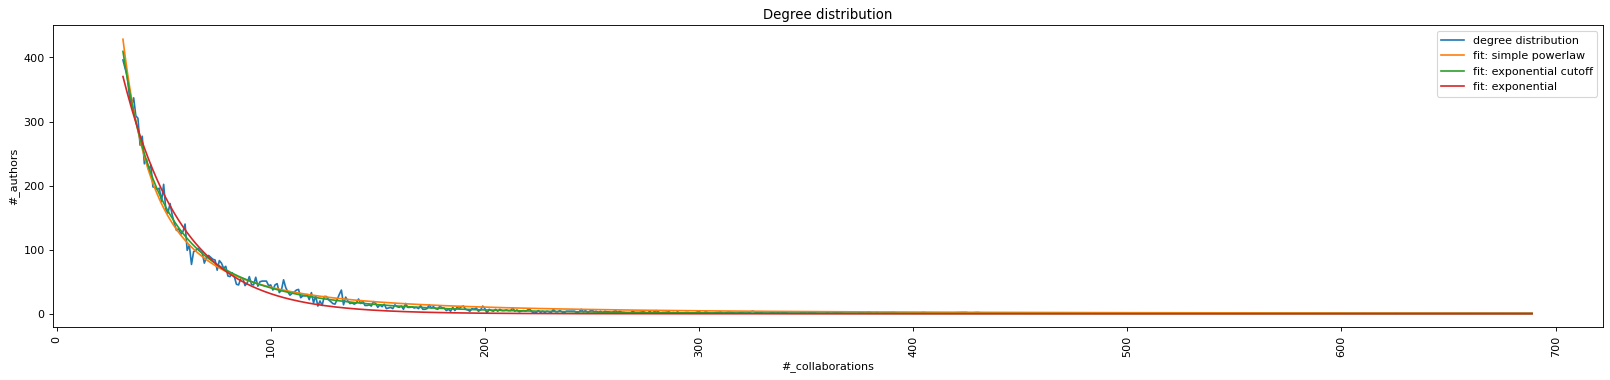

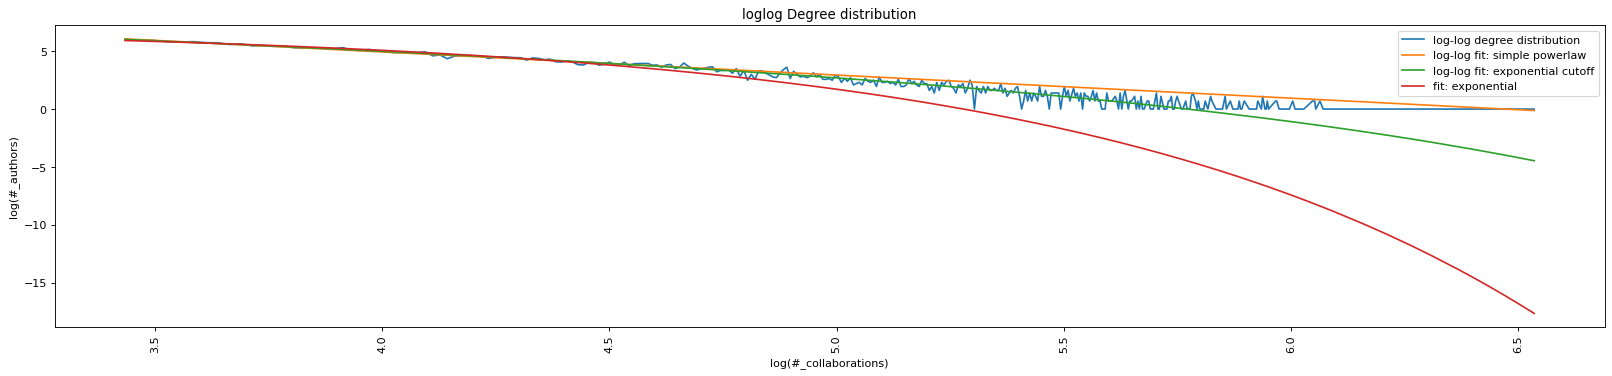




starting x = 40 

Power law fit with parameters -> c: 688596.6051007917 , gamma: 2.1221751370571473
Power law with exponential cutoff fit with parameters -> c: 91215.15980205376 , gamma: 1.4988868584058417 , sigma: 0.9918095198441264
exponential fit with parameters -> a: 0.9705130275622403 c: 773.787413410907

power law err: 10020.25631168967
exp err: 13900.563216079963
power law cutoff err: 7926.186427326746


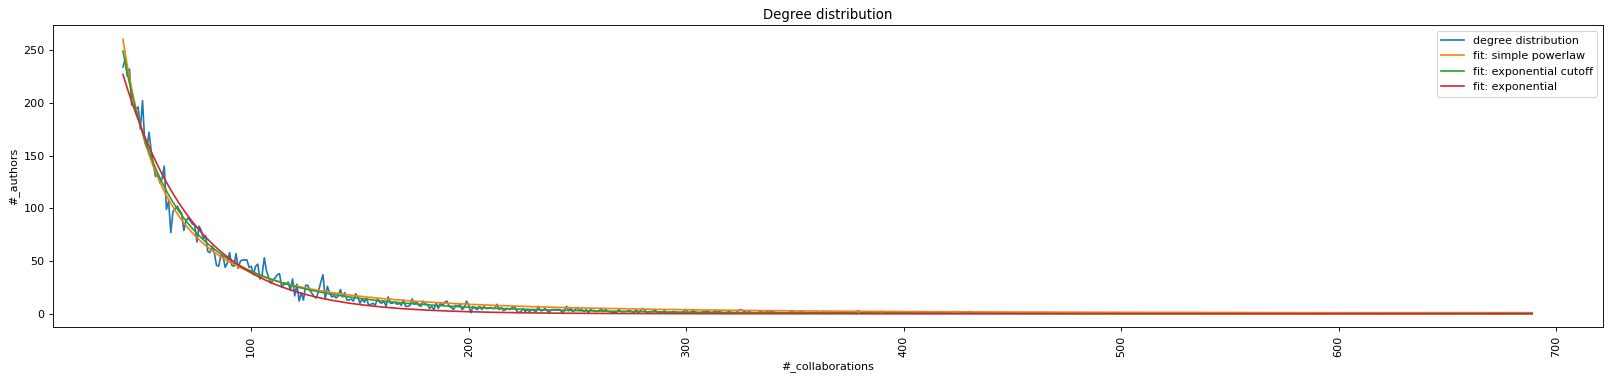

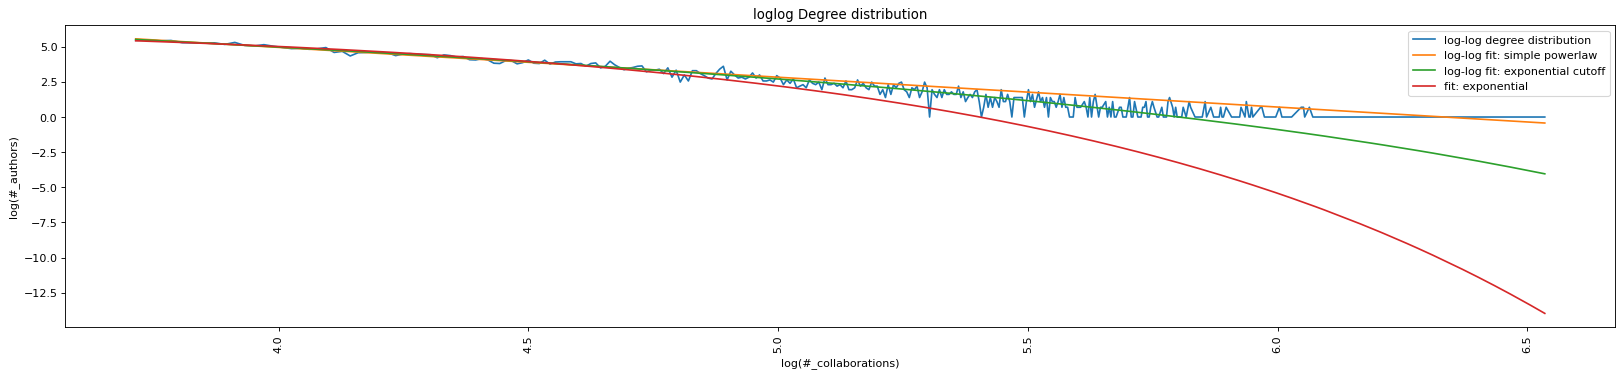




starting x = 50 

Power law fit with parameters -> c: 1116891.19623432 , gamma: 2.23278727330644
Power law with exponential cutoff fit with parameters -> c: 116138.66230621777 , gamma: 1.572911183086793 , sigma: 0.9927228775294865
exponential fit with parameters -> a: 0.9742983412161718 c: 568.6622089464825

power law err: 7144.024973546302
exp err: 8911.2311231006
power law cutoff err: 6291.044661955336


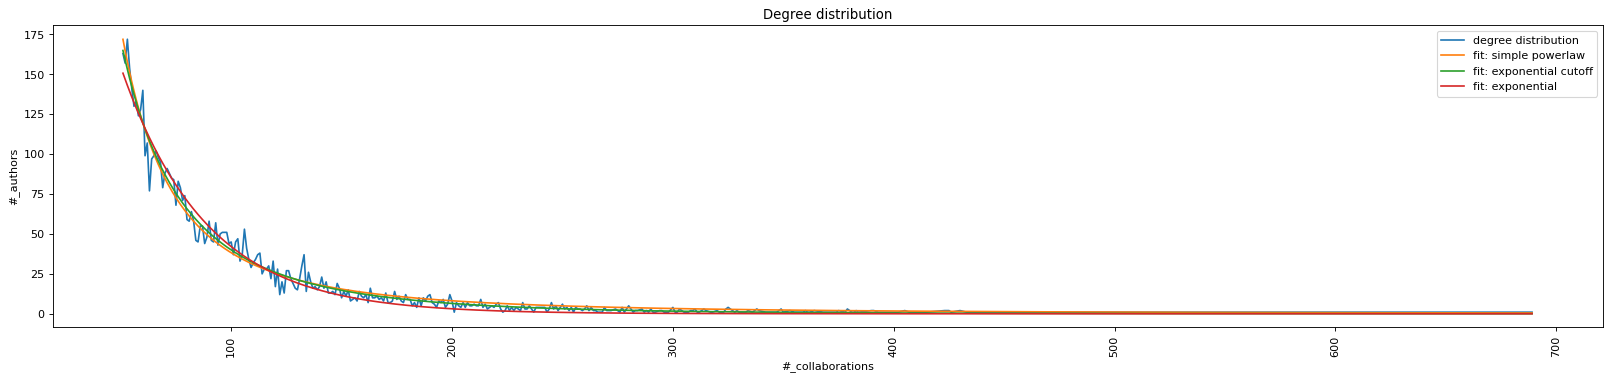

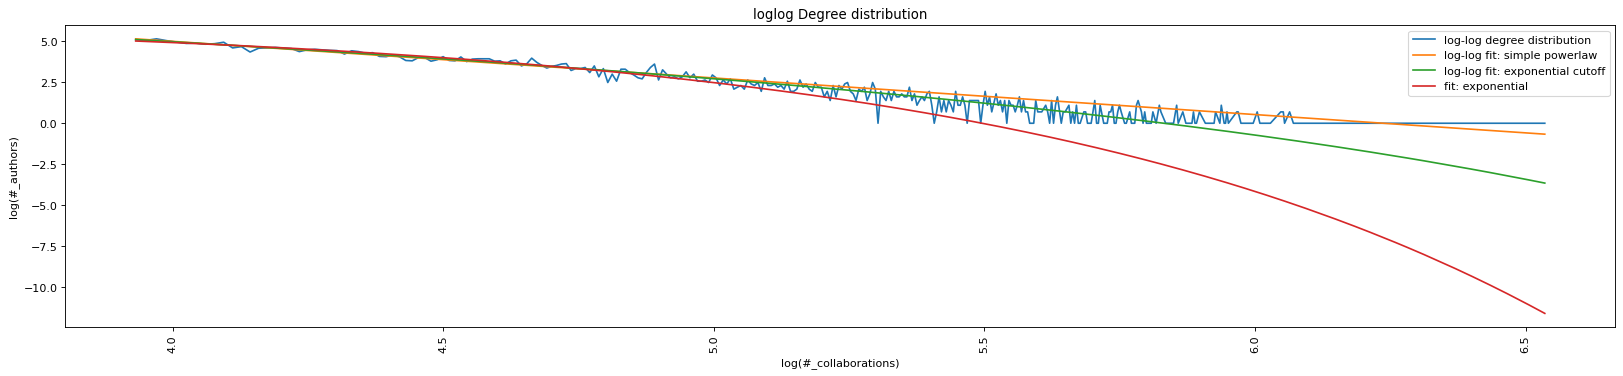




starting x = 60 

Power law fit with parameters -> c: 1184256.3455200081 , gamma: 2.246153161411344
Power law with exponential cutoff fit with parameters -> c: 13845.44735484882 , gamma: 1.0000001158524539 , sigma: 0.9879246551485661
exponential fit with parameters -> a: 0.9778448526087431 c: 403.0996477261579

power law err: 6227.3188751015705
exp err: 5156.0370776422915
power law cutoff err: 4922.140759985207


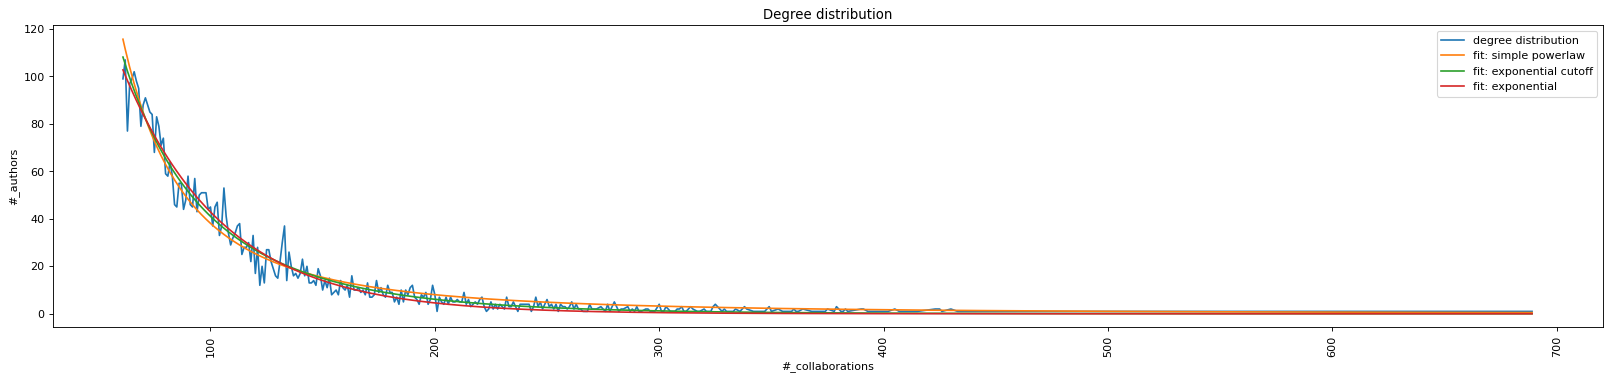

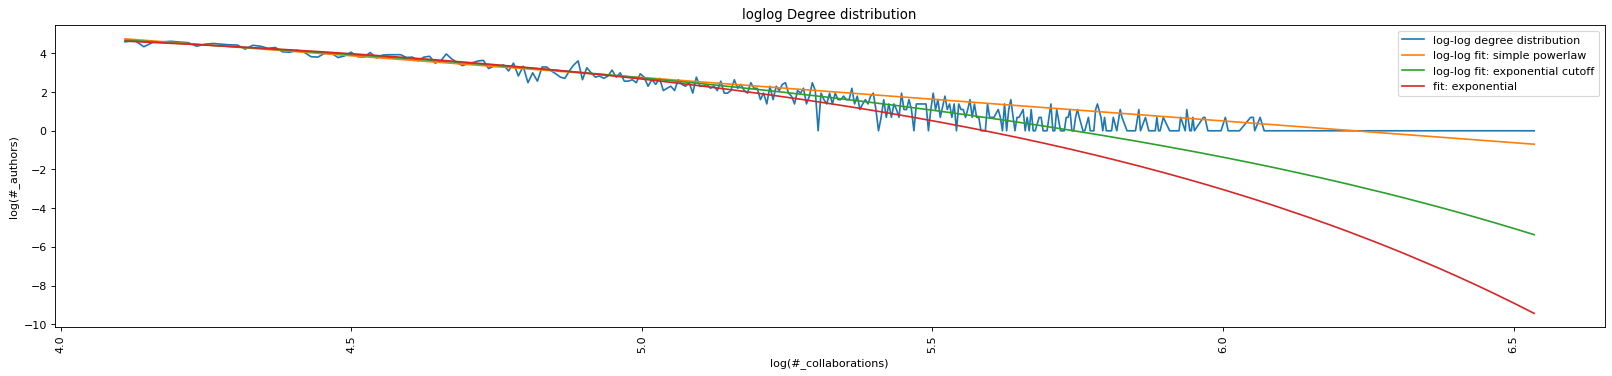




starting x = 70 

Power law fit with parameters -> c: 3363374.580196129 , gamma: 2.4677356506871115
Power law with exponential cutoff fit with parameters -> c: 157765.95295045612 , gamma: 1.6391083595226756 , sigma: 0.9928209962183693
exponential fit with parameters -> a: 0.9780476038008716 c: 393.4406776779869

power law err: 4032.9242403985904
exp err: 4330.565221044241
power law cutoff err: 3806.924144052894


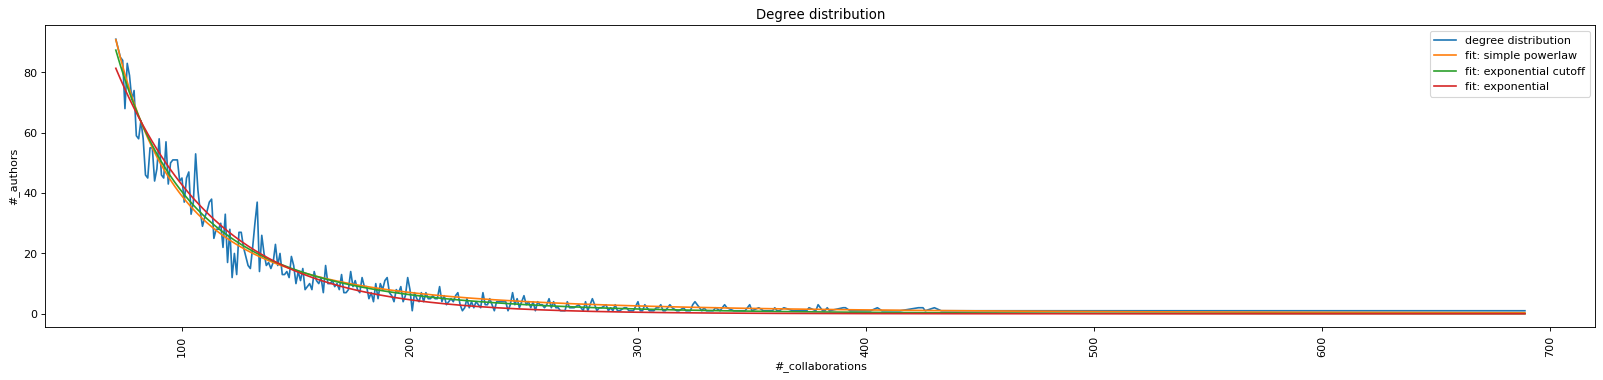

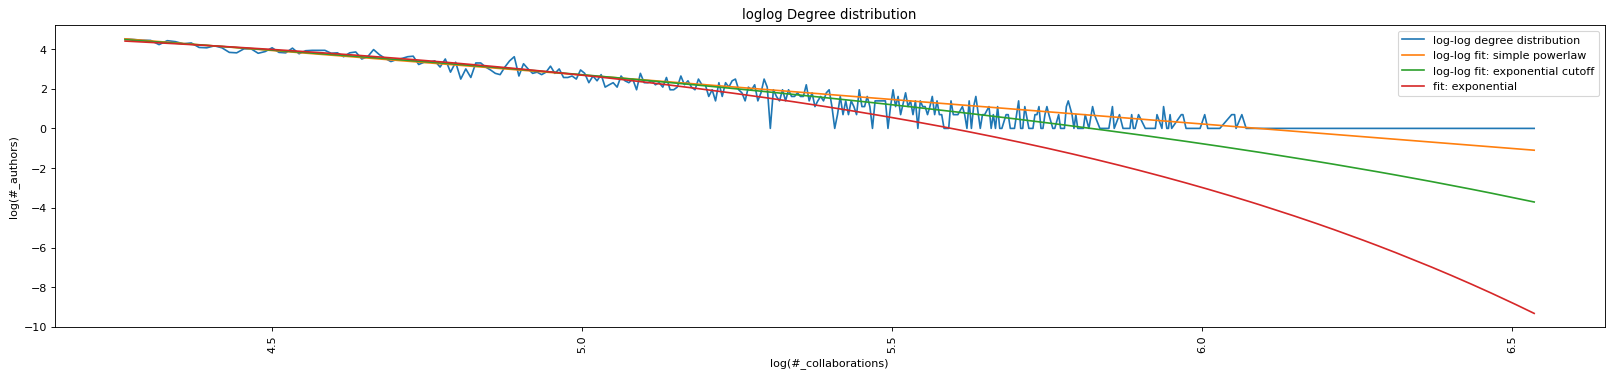




starting x = 80 

Power law fit with parameters -> c: 3550582.418695474 , gamma: 2.4788345297925742
Power law with exponential cutoff fit with parameters -> c: 13081.011268576774 , gamma: 1.000000004177075 , sigma: 0.9882925185784897
exponential fit with parameters -> a: 0.9801534028261957 c: 303.86812947598764

power law err: 3744.820916938186
exp err: 3413.33144903439
power law cutoff err: 3375.449808672038


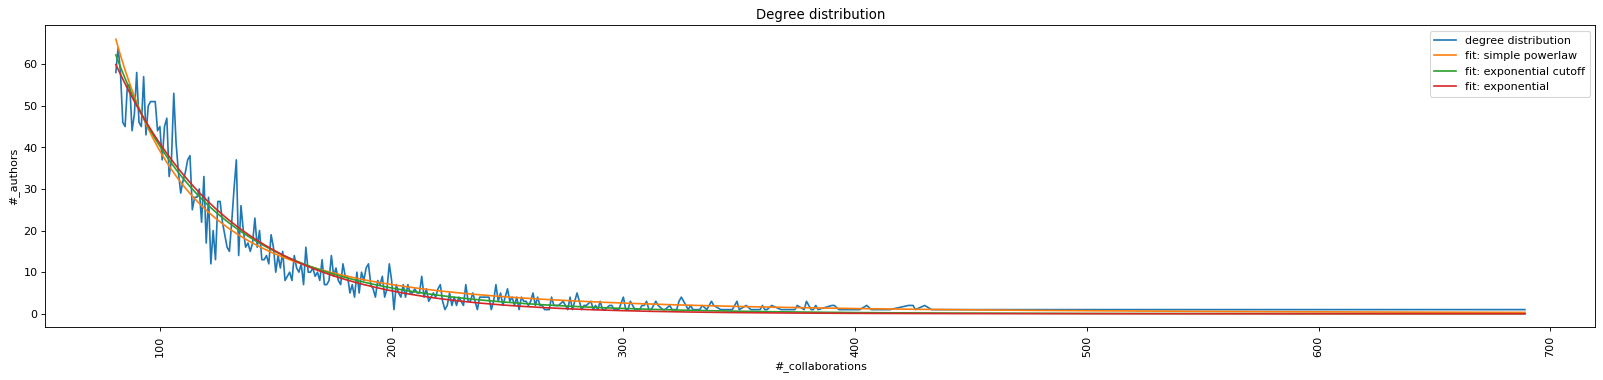

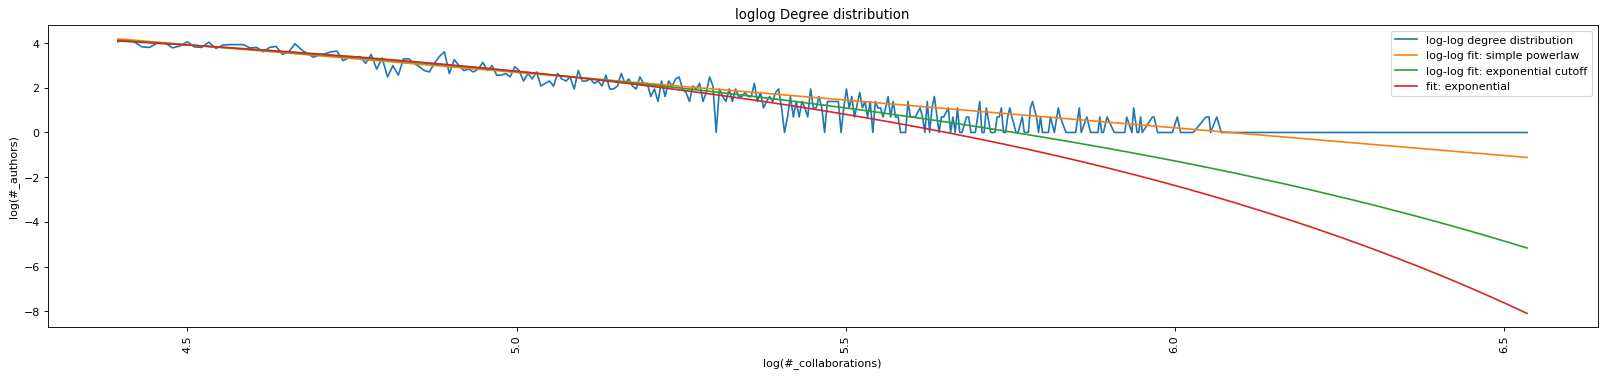




starting x = 90 

Power law fit with parameters -> c: 15107258.236561228 , gamma: 2.773531825781831
Power law with exponential cutoff fit with parameters -> c: 4558909.608741194 , gamma: 2.4650087212838026 , sigma: 0.9977565264969923
exponential fit with parameters -> a: 0.9792422496101887 c: 343.5450214742022

power law err: 2679.3208911913975
exp err: 2982.1665257260825
power law cutoff err: 2671.2521972528825


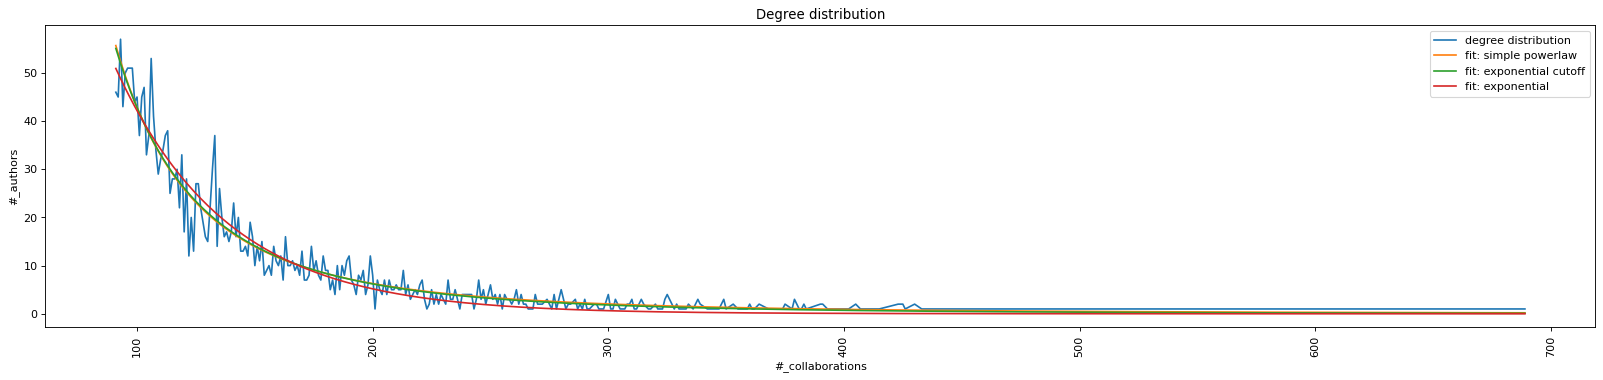

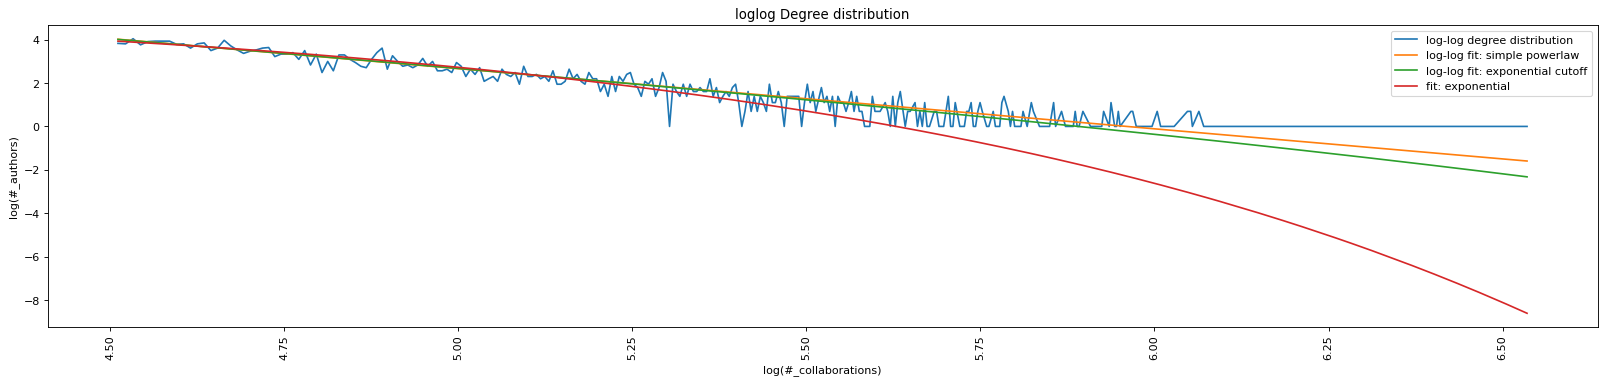




starting x = 100 

Power law fit with parameters -> c: 26307626.53034343 , gamma: 2.886097000905816
Power law with exponential cutoff fit with parameters -> c: 149500272.8314665 , gamma: 3.3223948260804046 , sigma: 1.0028841352968294
exponential fit with parameters -> a: 0.9802463991943644 c: 296.524954821615

power law err: 2330.050299899108
exp err: 2676.637500723736
power law cutoff err: 2319.7532306551498


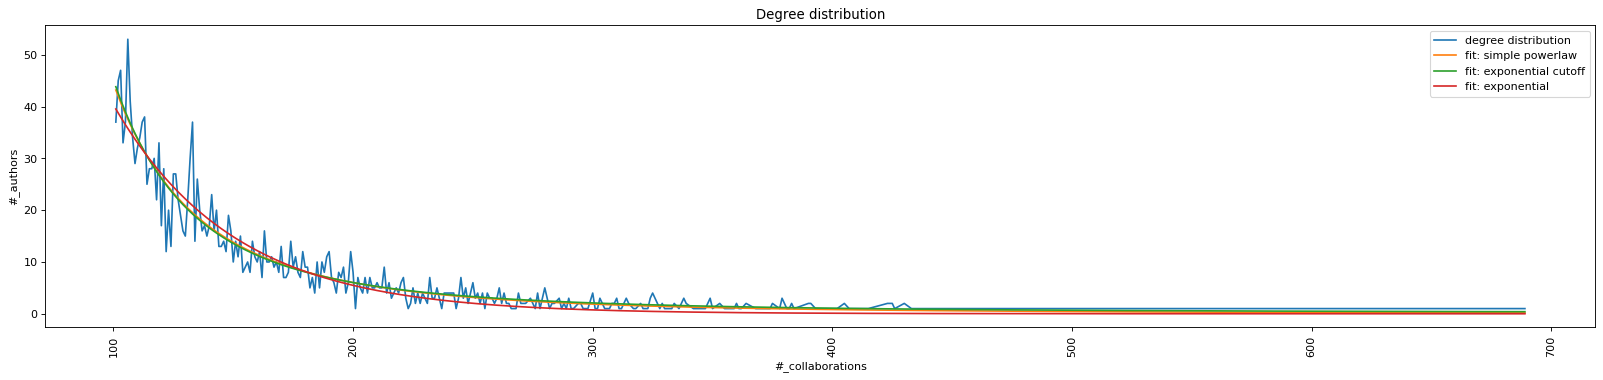

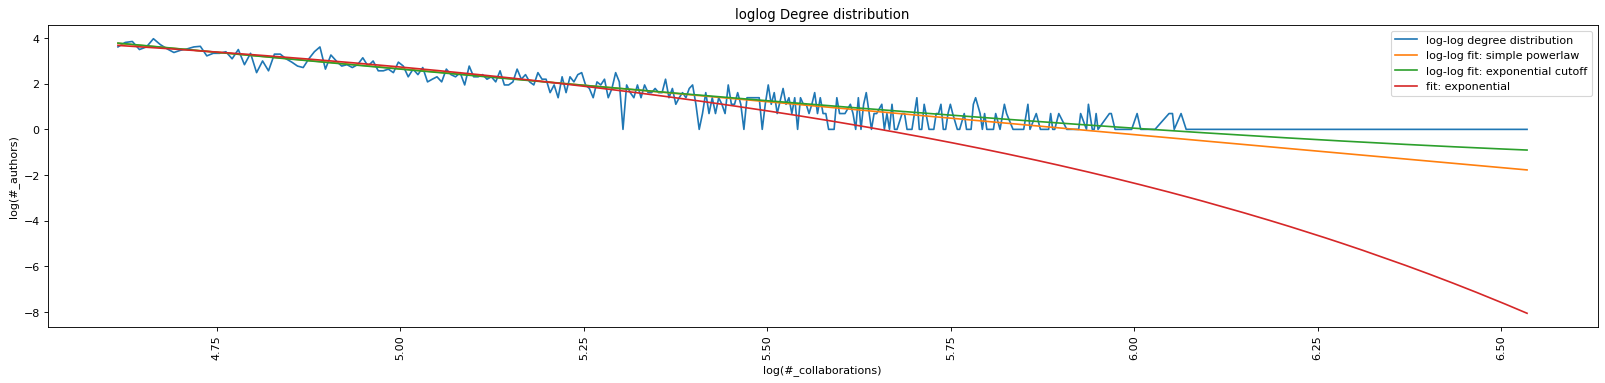

In [19]:
results = pd.DataFrame()

pl_errs = []
cutoff_errs = []
exp_errs = []
start_xs = [20, 30, 40, 50, 60, 70, 80, 90, 100]

for i in start_xs:
    
    print()
    print("starting x =",i, "\n")
    x, y = unique[i:], counts[i:]  
    my_powerlaw_Fit = fit_powerlaw(x, y)[0]
    my_powerlaw_cutoff_Fit = fit_powerlaw_exp_cutoff(x, y)[0]
    exp_fit = fit_exponential(x, y)[0]
    print()
    
    err_pl =  err(my_powerlaw_Fit, y)
    err_exp = err(exp_fit, y)
    err_cutoff = err(my_powerlaw_cutoff_Fit, y)
    
    pl_errs.append(err_pl)
    cutoff_errs.append(err_cutoff)
    exp_errs.append(err_exp)
    
    print("power law err:", err(my_powerlaw_Fit, y))
    print("exp err:", err(exp_fit, y))
    print("power law cutoff err:", err(my_powerlaw_cutoff_Fit, y))
    
    draw("Degree distribution",
         "#_collaborations", "#_authors",
         x,
         [y, my_powerlaw_Fit, my_powerlaw_cutoff_Fit, exp_fit], 
         ["degree distribution", "fit: simple powerlaw", "fit: exponential cutoff", "fit: exponential"],
         25, 5)
    
    
    draw("loglog Degree distribution",  
         "log(#_collaborations)", 
         "log(#_authors)", 
         np.log(x), 
         [np.log(y), np.log(my_powerlaw_Fit), np.log(my_powerlaw_cutoff_Fit), np.log(exp_fit)],
         ["log-log degree distribution", "log-log fit: simple powerlaw", "log-log fit: exponential cutoff", "fit: exponential"], 25, 5)
        
    print("\n==============================\n")
    
results["start_x"] = start_xs
results["Power law err"] = pl_errs
results["Power law with cutoff err"] = cutoff_errs
results["Exponential err"] = exp_errs

    

In [10]:
results

,start_x,Power law err,Power law with cutoff err,Exponential err
0,20,44678.003988,12778.739076,44120.602312
1,30,14974.788714,9547.311372,25542.635199
2,40,10020.256312,7926.186427,13900.563216
3,50,7144.024974,6291.044662,8911.231123
4,60,6227.318875,4922.140760,5156.037078
5,70,4032.924240,3806.924144,4330.565221
6,80,3744.820917,3375.449809,3413.331449
7,90,2679.320891,2671.252197,2982.166526
8,100,2330.050300,2319.753231,2676.637501
